In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler


In [2]:
from pycaret.regression import * 

/home/cdsw/.local/lib/python3.6/site-packages/pycaret/loggers/mlflow_logger.py:14: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  import mlflow


In [3]:
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
state = 'AL'

In [5]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_symptoms_df.fea'
symptoms_dataframe_ri = pd.read_feather(file_symptoms)


In [6]:
symptoms_dataframe_ri = symptoms_dataframe_ri.dropna()

In [7]:
symptoms_df = symptoms_dataframe_ri.iloc[:,17:]

In [8]:
symptoms_df['cj_living_area'] = symptoms_dataframe_ri['cj_living_area']
symptoms_df['avmValue'] = symptoms_dataframe_ri['avmValue']

In [9]:
symptoms_df['avmerror'] = symptoms_dataframe_ri['avmerror']

In [10]:
Predictors = symptoms_df.to_numpy()

In [11]:
Predictors.shape

(205759, 2227)

In [12]:
predictand = symptoms_dataframe_ri.avmerror.values

In [13]:
predictand.shape

(205759,)

In [14]:
train_samples = 150000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [15]:
exp_reg101 = setup(data = symptoms_df.tail(100000), target = 'avmerror', 
                   normalize = True,session_id = 123)


,Description,Value
0,session_id,123
1,Target,avmerror
2,Original Data,"(100000, 2227)"
3,Missing Values,False
4,Numeric Features,21
5,Categorical Features,2205
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69999, 2220)"


In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [19]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1300,0.0394,0.1985,0.1052,0.1481,4.9235,17.6670
xgboost,Extreme Gradient Boosting,0.1305,0.0398,0.1995,0.0962,0.1488,4.2424,130.4240
br,Bayesian Ridge,0.1325,0.0404,0.2009,0.0837,0.1464,8.7377,33.9560
ridge,Ridge Regression,0.1333,0.0405,0.2012,0.0804,0.1445,9.1889,2.6140
lr,Linear Regression,0.1333,0.0405,0.2013,0.0800,0.1445,9.2011,12.6110
lar,Least Angle Regression,0.1322,0.0406,0.2014,0.0789,0.1509,6.1564,2.9940
omp,Orthogonal Matching Pursuit,0.1330,0.0407,0.2016,0.0770,0.1475,10.4882,2.9430
gbr,Gradient Boosting Regressor,0.1324,0.0410,0.2025,0.0687,0.1572,2.5113,49.4690
huber,Huber Regressor,0.1324,0.0418,0.2043,0.0521,0.1501,6.8839,122.6890
rf,Random Forest Regressor,0.1345,0.0421,0.2051,0.0447,0.1393,4.3276,597.1320


In [17]:
lightgbm = create_model('lightgbm')

IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:59:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


ValueError: too many values to unpack (expected 3)

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:33:15
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.


In [ ]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [56]:
y_train.min()

-1.497061914191419

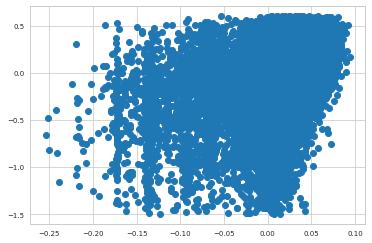

In [57]:
plt.plot(predictions_train,y_train,'o')

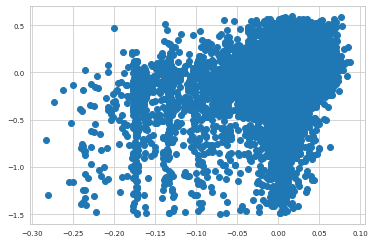

In [58]:
plt.plot(predictions_test,y_test,'o')

In [59]:
df = symptoms_dataframe_ri.copy()


In [60]:
predictions_test_value = df['avmValue'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue'].values[:train_samples]/(1-predictions_train)
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [61]:
df.columns

Index(['listingid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa', 'state',
       'Transdate', 'Transprice', 'cj_living_area', 'fips_code',
       ...
       'grinder pump', 'immaculate custom', 'high efficiency',
       'plenty room roam', 'neighborhood prattville', 'letson farms',
       'one of a kind home', 'adjacent lot', 'luxury vinyl',
       'spacious secondary bedrooms'],
      dtype='object', length=2241)

In [62]:
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples]- df['avmValue'].values[:train_samples])/\
              (df['Transprice'].values[:train_samples])))


0.13936668998544122
0.14185532301003315


In [63]:
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:]- df['avmValue'].values[train_samples:])/\
              (df['Transprice'].values[train_samples:])))


0.12164545202988955
0.12433022988479138


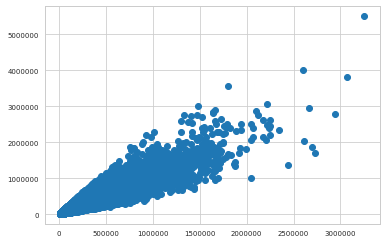

In [64]:
plt.plot(predictions_train_value,df['Transprice'].values[:train_samples],'o')

In [ ]:
df.columns

In [ ]:
fig = plt.figure(figsize=(12,10))
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
[features[i] for i in indices]

In [ ]:
import joblib
filename = 'RF_newmodel_01_3mins.sav'
joblib.dump(model,filename)